In [1]:
#Replace yamg, aja,so
import csv
with open('result/result_rawBOW_playstore_tambah_nltkEnglish3.csv', 'r', encoding="utf8") as nodecsv: # Buka file                       
    csvreader = csv.reader(nodecsv) # membaca data
    # Menyusun data dalam list dan menghilangkan header data
    words = [n for n in csvreader]

In [2]:
words

[['nyaman', 'banding', 'aplikasi'],
 ['sip'],
 ['sangan', 'bantu'],
 ['good'],
 ['maksud',
  'pingin',
  'mudah',
  'user',
  'id',
  'blokir',
  'gara',
  'gara',
  'nempel',
  'sidik',
  'jari',
  'tempel',
  'sebentar',
  'pemberitahuan',
  'salah',
  'buang',
  'fitur',
  'guna',
  'susah'],
 ['praktis'],
 ['kode', 'sms', 'autentikasi', 'masuk'],
 ['mantap',
  'mantap',
  'fitur',
  'beli',
  'jual',
  'saham',
  'bbri',
  'anak',
  'usaha'],
 ['keren', 'bangett', 'mantul'],
 ['transaksi', 'cepat'],
 ['simple', 'userfriendly'],
 ['awesome'],
 ['mantap', 'nyaman', 'aman', 'cepat'],
 ['good'],
 ['update',
  'bintang',
  'cepat',
  'langsung',
  'baik',
  'review',
  'kemarin',
  'responnya',
  'cepat',
  'terima',
  'kasih',
  'tampil',
  'bagus',
  'mudah',
  'guna',
  'lambat',
  'cek',
  'saldo',
  'rekenig',
  'makan',
  'menit',
  'koneksi',
  'internet',
  'lancar'],
 ['baik'],
 ['mantap'],
 ['great'],
 ['keren', 'abis', 'tampil', 'baru', 'top'],
 ['easy', 'use'],
 ['terimkasih

In [3]:
#bag of words
import gensim
dictionary = gensim.corpora.Dictionary(words)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 aplikasi
1 banding
2 nyaman
3 sip
4 bantu
5 sangan
6 good
7 blokir
8 buang
9 fitur
10 gara


In [4]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [5]:
bow_corpus = [dictionary.doc2bow(doc) for doc in words]
bow_corpus

[[(0, 1), (1, 1)],
 [],
 [(2, 1)],
 [(3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1)],
 [(13, 1), (14, 1), (15, 1)],
 [(5, 1), (16, 2)],
 [(17, 1), (18, 1)],
 [(19, 1), (20, 1)],
 [(21, 1)],
 [(22, 1)],
 [(1, 1), (16, 1), (19, 1), (23, 1)],
 [(3, 1)],
 [(6, 1),
  (8, 1),
  (19, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(25, 1)],
 [(16, 1)],
 [(37, 1)],
 [(17, 1), (34, 1), (38, 1)],
 [(39, 1), (40, 1)],
 [],
 [(23, 1)],
 [],
 [(40, 1), (41, 1), (42, 1), (43, 1)],
 [(36, 1), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(24, 1)],
 [(30, 1), (41, 1), (48, 1), (49, 1), (50, 1), (51, 1)],
 [(52, 1)],
 [],
 [(53, 1)],
 [(52, 1), (54, 1)],
 [(0, 1)],
 [(16, 1)],
 [(16, 1)],
 [(0, 1), (41, 1)],
 [(3, 1)],
 [],
 [(3, 1), (52, 1)],
 [(8, 1), (20, 1), (55, 1), (56, 1)],
 [(2, 1)],
 [(42, 1), (57, 1)],
 [(0, 1), (14, 1)],
 [(3, 1)],
 [(33, 1), (58, 2), (59, 1

In [6]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

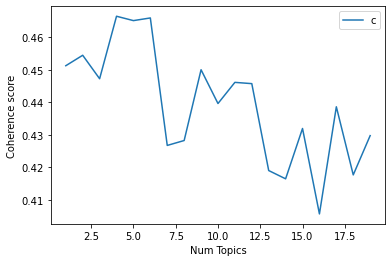

Num Topics = 1  has Coherence Value of 0.451299
Num Topics = 2  has Coherence Value of 0.45452
Num Topics = 3  has Coherence Value of 0.44729
Num Topics = 4  has Coherence Value of 0.466538
Num Topics = 5  has Coherence Value of 0.465193
Num Topics = 6  has Coherence Value of 0.466012
Num Topics = 7  has Coherence Value of 0.42675
Num Topics = 8  has Coherence Value of 0.428261
Num Topics = 9  has Coherence Value of 0.45006
Num Topics = 10  has Coherence Value of 0.439658
Num Topics = 11  has Coherence Value of 0.446172
Num Topics = 12  has Coherence Value of 0.445781
Num Topics = 13  has Coherence Value of 0.419014
Num Topics = 14  has Coherence Value of 0.416463
Num Topics = 15  has Coherence Value of 0.431971
Num Topics = 16  has Coherence Value of 0.405655
Num Topics = 17  has Coherence Value of 0.438653
Num Topics = 18  has Coherence Value of 0.417675
Num Topics = 19  has Coherence Value of 0.429765


In [7]:
start=1
limit=20
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=bow_corpus,texts=words, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

In [8]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4,id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.060*"mudah" + 0.054*"cepat" + 0.051*"mantap" + 0.050*"transaksi" + 0.045*"bagus" + 0.036*"baik" + 0.033*"user" + 0.032*"bantu" + 0.030*"nyaman" + 0.029*"aman"
Topic: 1 
Words: 0.059*"fitur" + 0.045*"banget" + 0.039*"app" + 0.039*"lengkap" + 0.031*"mudah" + 0.030*"easy" + 0.026*"login" + 0.025*"use" + 0.024*"cepat" + 0.022*"transaksi"
Topic: 2 
Words: 0.156*"good" + 0.081*"koneksi" + 0.058*"putus" + 0.030*"login" + 0.026*"nice" + 0.022*"internet" + 0.019*"apps" + 0.018*"transaksi" + 0.017*"bagus" + 0.017*"jaring"
Topic: 3 
Words: 0.043*"transaksi" + 0.035*"aplikasi" + 0.030*"kode" + 0.028*"error" + 0.027*"buka" + 0.027*"login" + 0.027*"brimo" + 0.026*"kali" + 0.025*"mudah" + 0.022*"password"
